1.   [Reference 1](https://www.crcv.ucf.edu/wp-content/uploads/2019/03/Lecture-6-SIFT.pdf)
2.   [Reference 2](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb)
3. [Reference 3](https://colab.research.google.com/github/zszazi/MSD/blob/master/SIFT_feature_matching.ipynb#scrollTo=jrdubeJU1s6F)



In [6]:
import cv2
import numpy as np
import scipy
from skimage import io
import skimage
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Basic Implemenettaion of SIFT by calling the function.

In [7]:
import cv2

def sift_features(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)

    return keypoints, descriptors

In [8]:
image_path = '/content/peacock.jfif'
keypoints, descriptors = sift_features(image_path)

print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of keypoints: 468
Descriptor shape: (468, 128)


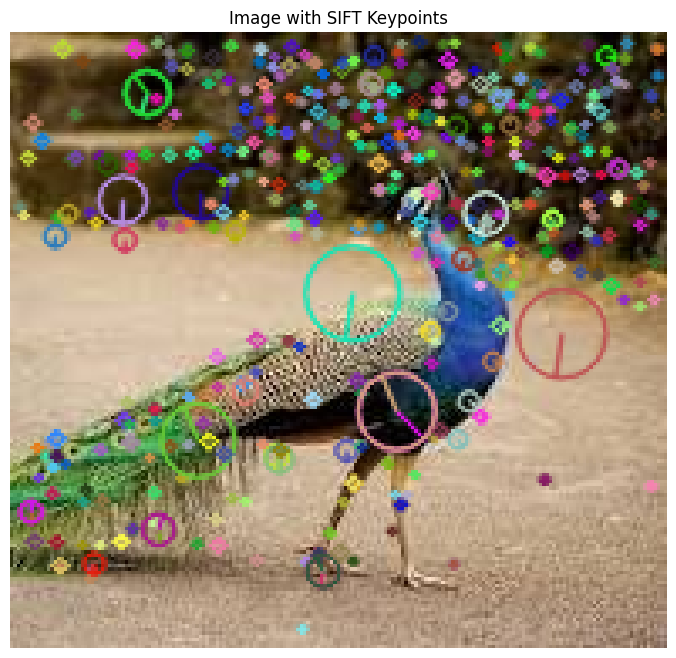

In [9]:
import matplotlib.pyplot as plt
img = cv2.imread(image_path)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Image with SIFT Keypoints")
plt.axis('off')
plt.show()

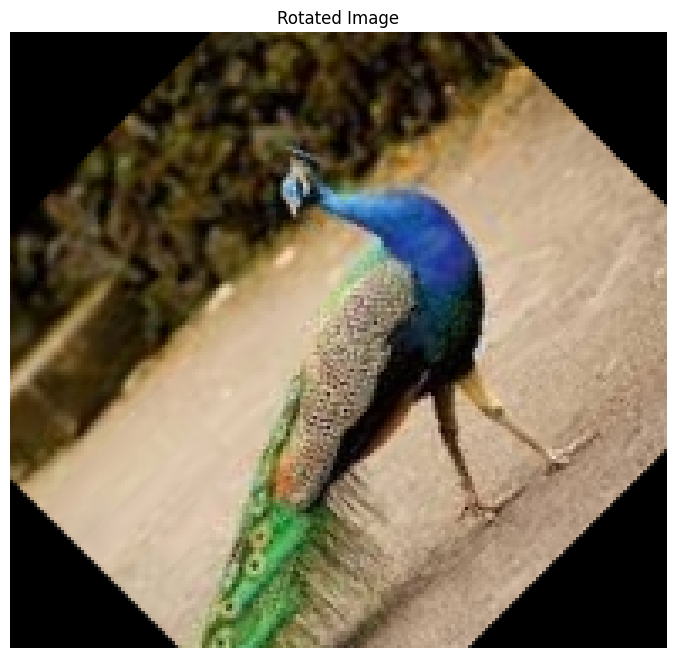

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(image_path)
angle = 45

rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')
plt.show()

Number of keypoints (rotated): 387
Descriptor shape (rotated): (387, 128)


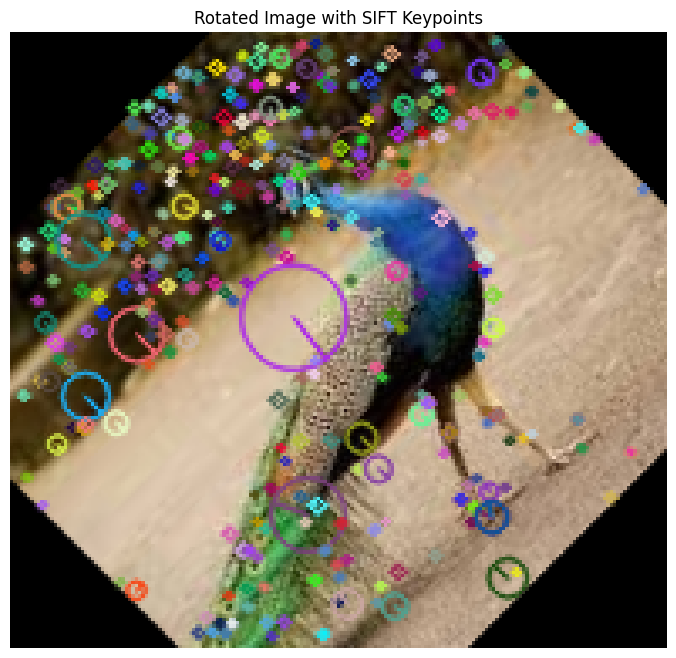

In [12]:
import matplotlib.pyplot as plt
image_path = '/content/peacock.jfif'
img = cv2.imread(image_path)
angle = 45

rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))

import os
import tempfile

temp_file, temp_path = tempfile.mkstemp(suffix='.jpg')
os.close(temp_file)

cv2.imwrite(temp_path, rotated_img)

keypoints_rotated, descriptors_rotated = sift_features(temp_path)

os.remove(temp_path)

print(f"Number of keypoints (rotated): {len(keypoints_rotated)}")
print(f"Descriptor shape (rotated): {descriptors_rotated.shape}")

img_with_keypoints_rotated = cv2.drawKeypoints(rotated_img, keypoints_rotated, rotated_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_with_keypoints_rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image with SIFT Keypoints")
plt.axis('off')
plt.show()

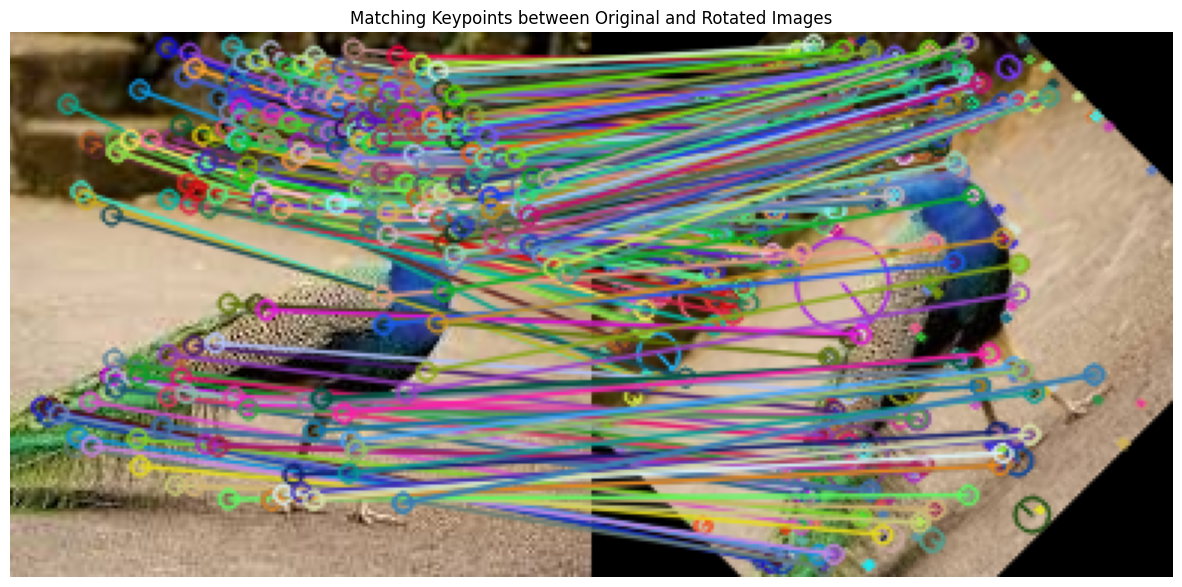

In [13]:
import matplotlib.pyplot as plt
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors, descriptors_rotated, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

img_matches = cv2.drawMatchesKnn(img, keypoints, rotated_img, keypoints_rotated, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Matching Keypoints between Original and Rotated Images")
plt.axis('off')
plt.show()
